In [28]:
import pandas as pd
from binance.client import Client
import datetime
import mplfinance as mpf

# Replace with Binance API keys
#api_key = 'your_api_key'
#api_secret = 'your_api_secret'

#client = Client(api_key, api_secret)
client = Client()

In [29]:
client.get_all_tickers()

[{'symbol': 'ETHBTC', 'price': '0.04828000'},
 {'symbol': 'LTCBTC', 'price': '0.00106000'},
 {'symbol': 'BNBBTC', 'price': '0.00859200'},
 {'symbol': 'NEOBTC', 'price': '0.00016840'},
 {'symbol': 'QTUMETH', 'price': '0.00077700'},
 {'symbol': 'EOSETH', 'price': '0.00017520'},
 {'symbol': 'SNTETH', 'price': '0.00000751'},
 {'symbol': 'BNTETH', 'price': '0.00018340'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00005530'},
 {'symbol': 'BNBETH', 'price': '0.17800000'},
 {'symbol': 'BTCUSDT', 'price': '67319.69000000'},
 {'symbol': 'ETHUSDT', 'price': '3250.01000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000024'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

### Define a function to retreive historical bitcoin data, in this case we are retrieving 5 minute intervals

In [30]:
def get_historical_data(symbol, interval, days):
    # Calculate the start time (40 days ago from now)
    start_time = datetime.datetime.now() - datetime.timedelta(days=days)
    start_time_str = start_time.strftime('%Y-%m-%d %H:%M:%S')

    # Fetch historical klines data
    klines = client.get_historical_klines(symbol, interval, start_time_str)
    
    # Convert to DataFrame
    klines_df = pd.DataFrame(klines)
    
    # Assign column names
    klines_df.columns = [
        'Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 
        'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 
        'Taker buy quote asset volume', 'Ignore'
    ]
    
    klines_df['Open time'] = pd.to_datetime(klines_df['Open time']/1000, unit = 's')
    klines_df['Close time'] = pd.to_datetime(klines_df['Close time']/1000, unit = 's')
    
    numeric_columns = [
        'Open', 'High', 'Low', 'Close', 'Volume', 'Quote asset volume',
        'Taker buy base asset volume', 'Taker buy quote asset volume'
    ]
    klines_df[numeric_columns] = klines_df[numeric_columns].apply(pd.to_numeric, axis=1)
    return klines_df

# Fetch Bitcoin prices at 5-minute intervals for the last 40 days
symbol = 'BTCEUR'
interval = Client.KLINE_INTERVAL_5MINUTE
days = 40

bitcoin_data = get_historical_data(symbol, interval, days)
bitcoin_data.head()


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2024-06-16 14:30:00,62253.39,62261.04,62211.65,62220.57,0.02572,2024-06-16 14:34:59.999000072,1600.611104,20,0.01250,778.075234,0
1,2024-06-16 14:35:00,62220.98,62258.42,62201.81,62252.92,0.02384,2024-06-16 14:39:59.999000072,1483.395821,20,0.01299,808.444885,0
2,2024-06-16 14:40:00,62250.99,62284.86,62250.99,62271.60,0.02642,2024-06-16 14:44:59.999000072,1645.349684,17,0.02024,1260.563126,0
3,2024-06-16 14:45:00,62271.75,62293.09,62240.51,62291.53,0.28301,2024-06-16 14:49:59.999000072,17620.815348,31,0.00870,541.894306,0
4,2024-06-16 14:50:00,62257.00,62266.66,62208.66,62208.66,0.00964,2024-06-16 14:54:59.999000072,600.211622,12,0.00896,557.889825,0


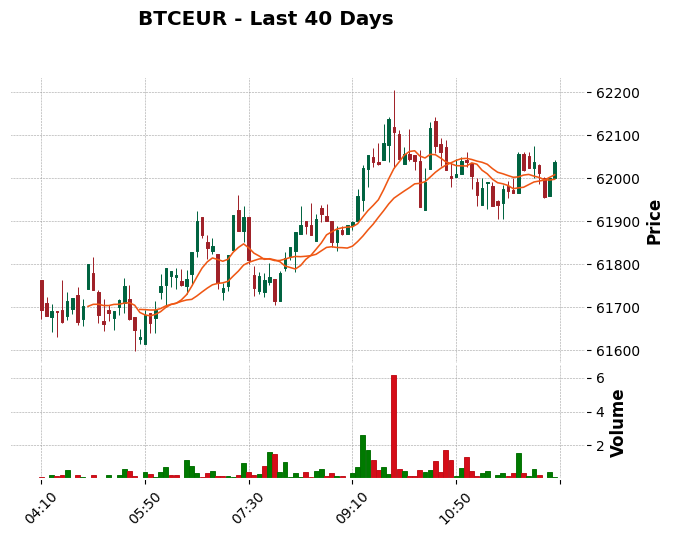

In [35]:
# Plot the data using mplfinance
mpf.plot(bitcoin_data.set_index('Open time').tail(100),
         type='candle',
         volume=True,
         title=f'{symbol} - Last {days} Days',
         style='charles',
         mav = (10,20),
         warn_too_much_data=len(bitcoin_data) + 1
        )